### Q2 . Using Titanic dataset, to do the following:

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt
# sns.set_style('whitegrid')
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**a**.  Clean the data by dropping the column which has the largest number of missing values.

In [12]:
max_nan_col = titanic.isna().sum().idxmax()
print("Column with maximum missing value:",max_nan_col)
titanic.drop(columns=[max_nan_col])

Column with maximum missing value: deck


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


**b**.  Find total number of passengers with age more than 30

In [13]:
titanic[titanic['age']>30].shape[0]
# titanic.age.aggregate(lambda x: x>30).sum()

305

**c**.  Find total fare paid by passengers of second class

In [14]:
titanic[titanic['class']=='Second'].fare.sum()

3801.8417

**d**.  Compare number of survivors of each passenger class

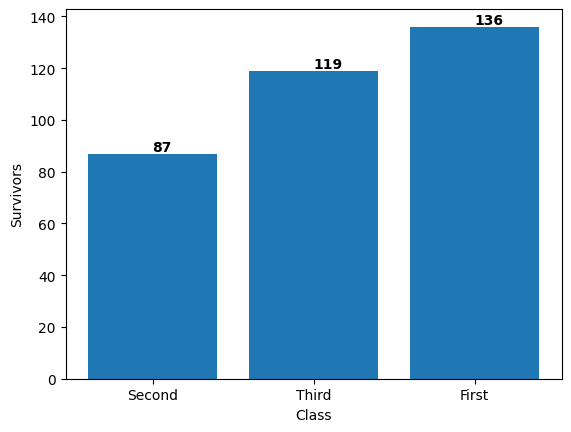

<Figure size 640x480 with 0 Axes>

In [15]:
survivors = titanic[titanic.alive == 'yes']
x = list(set(titanic['class']))
y = [survivors[survivors['class'] == i].shape[0] for i in x] # .shape[0] helps in counting rows since sum doesn't give required result
plt.bar(x = x, height=y)
plt.xlabel("Class")
plt.ylabel("Survivors")
for index, value in enumerate(y):
    plt.text(index,value+1,str(value), fontweight = 'bold')
plt.show()
plt.savefig('d')

**e**.  Compute descriptive statistics for age attribute gender wise

In [16]:
age_stats_gender_wise = titanic.groupby('sex')['age'].describe()
age_stats_gender_wise

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


**f**.  Draw a scatter plot for passenger fare paid by Female and Male passengers separately

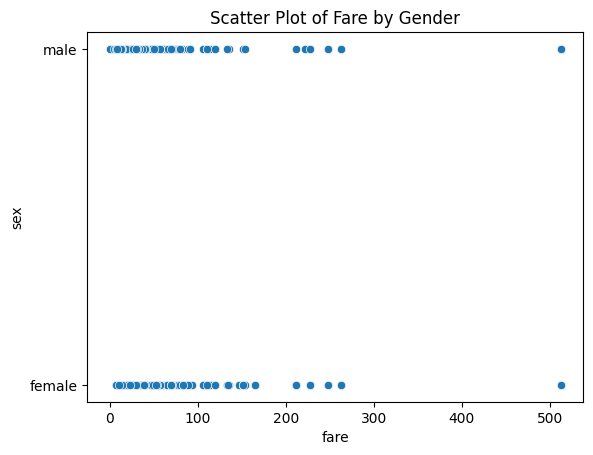

<Figure size 640x480 with 0 Axes>

In [17]:
sns.scatterplot(data=titanic, x='fare', y='sex')
plt.title("Scatter Plot of Fare by Gender")
plt.show()
plt.savefig('f')


**g**.  Compare density distribution for features age and passenger fare

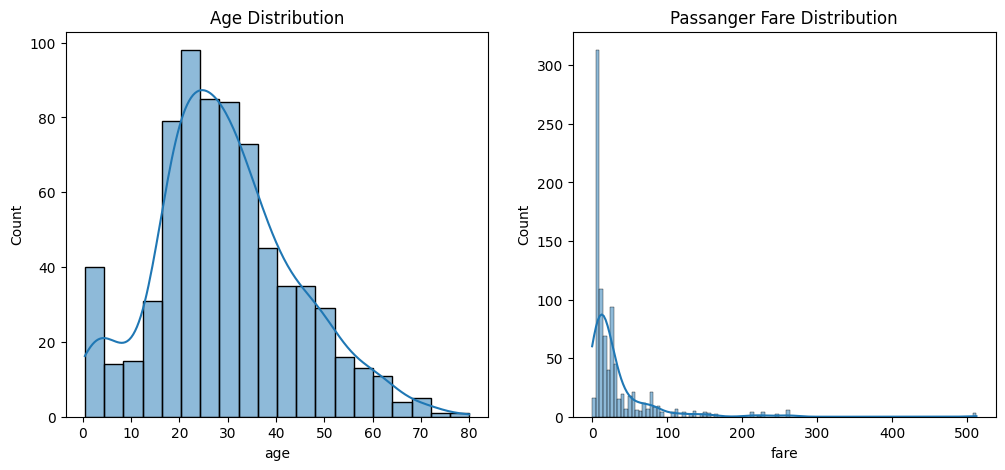

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(titanic['age'], kde=True)
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(titanic['fare'], kde=True)
plt.title("Passanger Fare Distribution")

plt.show()
plt.savefig('g')


**h**.  Draw the pie chart for three groups labelled as class 1, class 2, class 3 respectively displayed in different colours. The occurrence of each group converted into percentage should be displayed in the pie chart. Appropriately Label the chart.

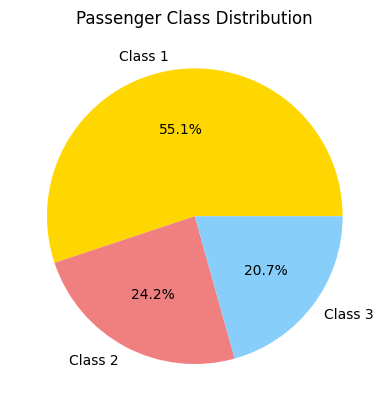

<Figure size 640x480 with 0 Axes>

In [19]:
class_counts = titanic['class'].value_counts()
labels = ['Class 1', 'Class 2', 'Class 3']
colors = ['gold', 'lightcoral', 'lightskyblue']
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Passenger Class Distribution")
plt.show()
plt.savefig('h')


**i**. Find % of survived passengers for each class and answer the question “Did class play a role in
survival?”.

In [20]:
survival_by_class = titanic.groupby('class')['survived'].mean() * 100
print("Percentage of Survived Passengers by Class:")
print(survival_by_class)

Percentage of Survived Passengers by Class:
class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64
